## ThinkDSP

This notebook contains code examples from Chapter 1: Sounds and Signals

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)


## Think DSP module

`thinkdsp` — це модуль, який супроводжує _Think DSP_ і надає класи та функції для роботи з сигналами.

[Documentation of the thinkdsp module is here](http://greenteapress.com/thinkdsp.html).

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

## Waves

Сигнал представляє математичну функцію, визначену для кожного моменту часу. Якщо визначити сигнал в послідовності рівновіддалених моментів часу, результатом буде хвиля.

`framerate` це кількість таких визначених точок за секунду.

In [ ]:
filename = 'pib.wav'

if not os.path.exists(filename):
    !wget https://github.com/nemyrovskaa/AudioProcess/raw/main/pib.wav

`read_wave` читає WAV файли.

In [ ]:
from thinkdsp import read_wave
from thinkdsp import play_wave

wave = read_wave(filename)

`make_audio()` створює віджет, який дозволяє програти аудіо в форматі wav

In [ ]:
wave.make_audio()

In [ ]:
framerate = wave.framerate

print('Частота дискретизації (Hz) = ', framerate)
print('Період дискретизації (us)  = ', 1 / framerate)

Частота дискретизації (Hz) =  44100
Період дискретизації (us)  =  2.2675736961451248e-05


Тривалість сигналу 5.5 секунд.

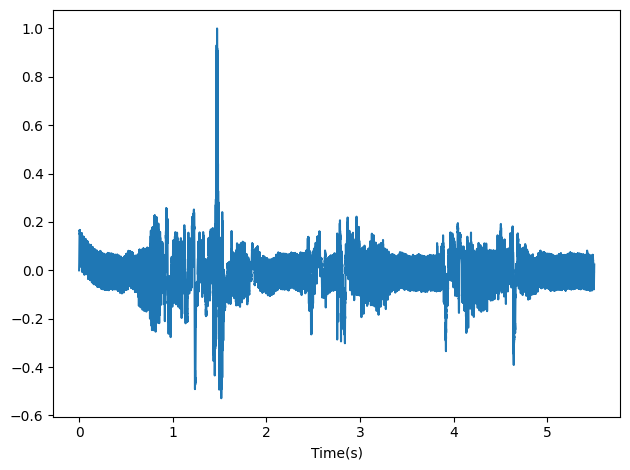

In [ ]:
wave.plot()
decorate(xlabel = 'Time(s)')

При побудові графіку виділеного сегменту, не можна чітко побачити форму хвилі, проте можна побачити загальний контур звукового сигналу, який дозволяє відслідкувати зміни в амплітуді.

Виріжемо сегмент від 0.6 до 1.6 с.

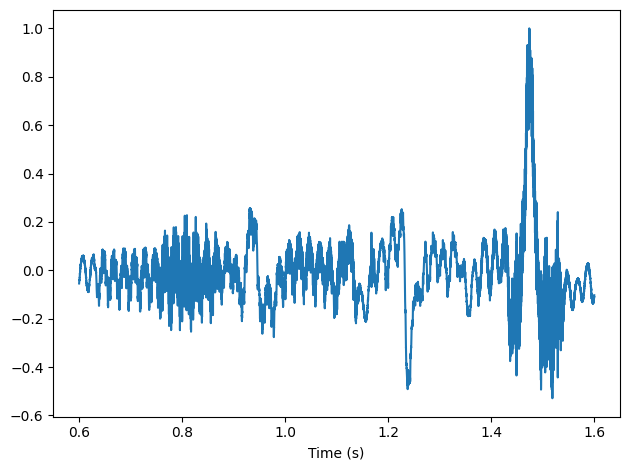

In [ ]:
start = 0.6
duration = 1.0
segment = wave.segment(start, duration)
segment.plot()
decorate(xlabel='Time (s)')

Виділимо літеру Н на проміжку від 0.6 до 0.75

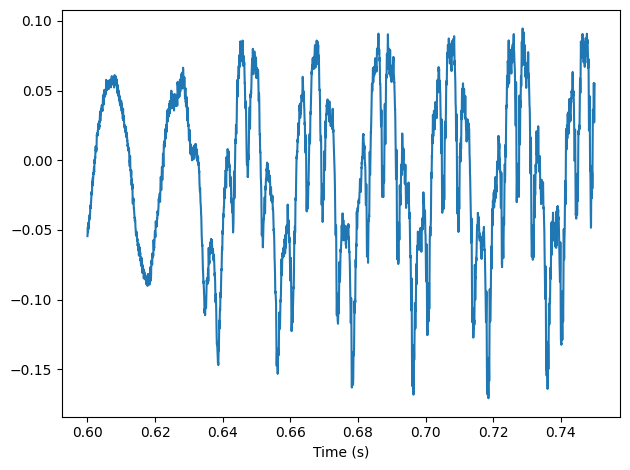

In [ ]:
startN = 0.6
durationN = 0.15
segmentN = wave.segment(startN, durationN)
segmentN.plot()
decorate(xlabel='Time (s)')

Виділимо літеру А на проміжку від 1.6 до 1.7

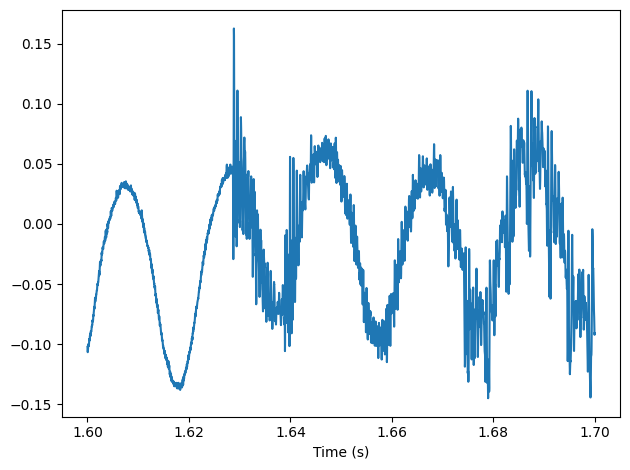

In [ ]:
startA = 1.6
durationA = 0.1
segmentA = wave.segment(startA, durationA)
segmentA.plot()
decorate(xlabel='Time (s)')

Виділимо літеру C на проміжку від 4.1 до 4.2

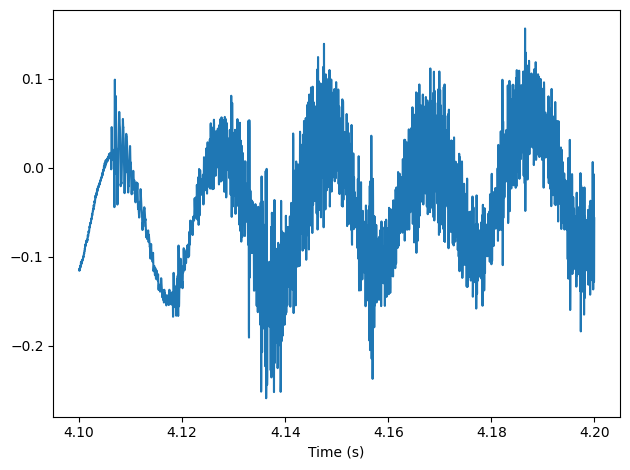

In [ ]:
startS = 4.1
durationS = 0.1
segmentS = wave.segment(startS, durationS)
segmentS.plot()
decorate(xlabel='Time (s)')

## Spectrums

Wave надає функцію `make_spectrum`, яка розраховує спектральний склад звуку.

In [ ]:
spectrum = segment.make_spectrum()

Спектр можна побудувати за допомогою `plot`

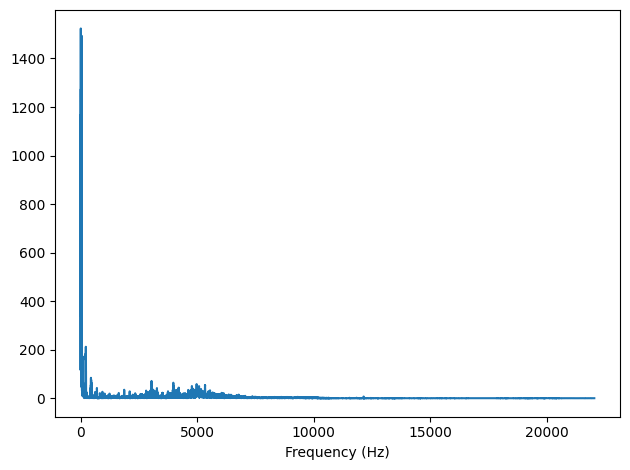

In [ ]:
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Компонентів з частотою більше 6 kHz досить мало. Можна краще роздивитися графік поставивши верню ланку частоти в 6000.

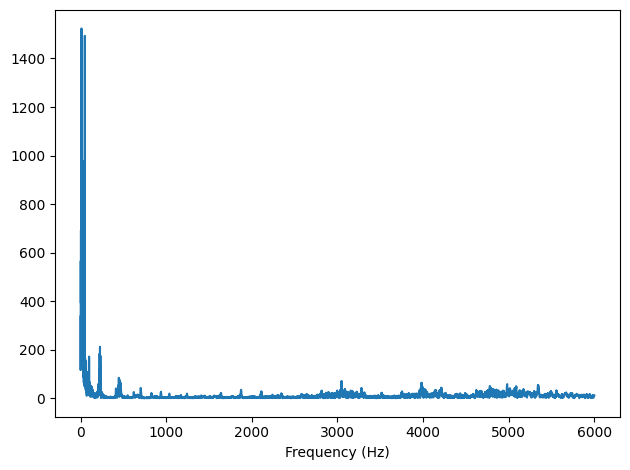

In [ ]:
spectrum.plot(high=6000)
decorate(xlabel='Frequency (Hz)')

Spectrum надає функцію `low_pass`, яка використовується як фільтр частот. Вона послаблює всі компоненти вище зазначеної частоти.

In [ ]:
spectrum.low_pass(3000)

Результатом є спектр з меншбю кількістю компонентів.

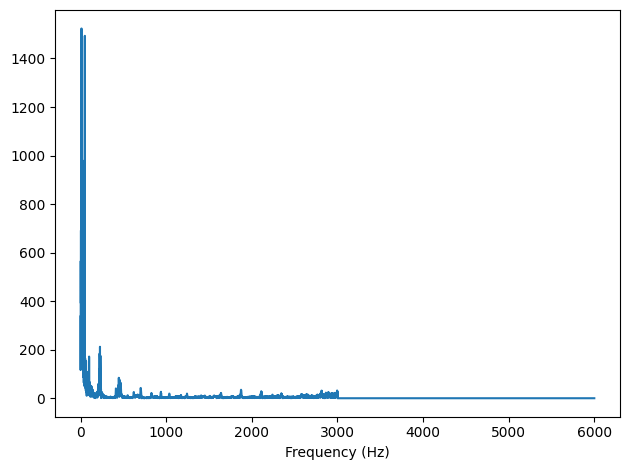

In [ ]:
spectrum.plot(high=6000)
decorate(xlabel='Frequency (Hz)')

Відфільтрований спектр можна знов перетворити в wave

In [ ]:
filtered = spectrum.make_wave()

Далі нормалізємо від -1 до 1

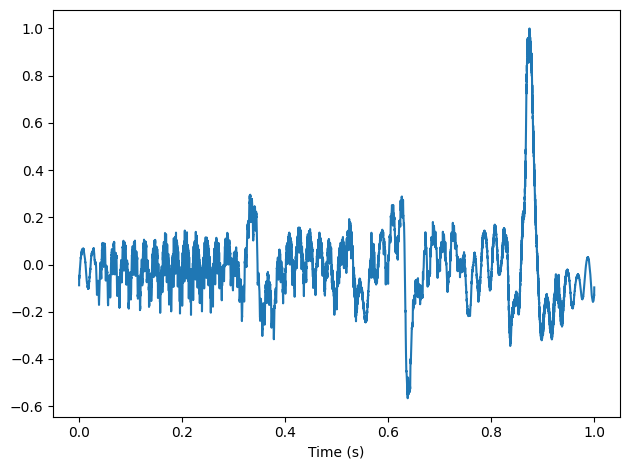

In [ ]:
filtered.normalize()
filtered.plot()
decorate(xlabel='Time (s)')

Теж саме виконуємо над оригінальним сегментом.

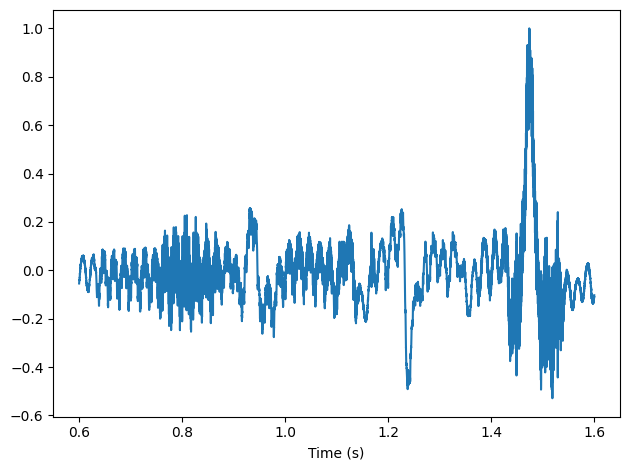

In [ ]:
segment.normalize()
segment.plot()
decorate(xlabel='Time (s)')

В кінці можна почути оригінальний сегмент та відфільтрований.

In [ ]:
segment.make_audio()

In [ ]:
filtered.make_audio()

Оригінал звучить складніше, з деякими високочастотними компонентами, які звучать дзвінко. Відфільтрована версія звучить більше як чистий тон, з більш приглушеною якістю.